In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
import time
sys.path.insert(0,'../..')
import omama as O

In [3]:
imgs = O.DataHelper.get2D(config_num=2, N=10, randomize=True, timing=True)

get2D                    ...took     6.415758 seconds


In [4]:
keypoint_intensities = O.Features.sift_keypoints(imgs, timing=True)

SIFT                     ...took     1.332215 seconds
SIFT                     ...took     1.079796 seconds
SIFT                     ...took     1.113744 seconds
SIFT                     ...took     1.045148 seconds
SIFT                     ...took     0.841251 seconds
SIFT                     ...took     1.228985 seconds
SIFT                     ...took     1.073213 seconds
SIFT                     ...took     1.062710 seconds
SIFT                     ...took     1.095969 seconds
SIFT                     ...took     1.103577 seconds
KeyPointIntensities      ...took    11.228363 seconds
SIFT keypoints           ...took    11.228489 seconds


In [5]:
keypoint_intensities

[array([169.1282  , 162.96338 , 162.02931 , 154.24542 , 157.54579 ,
        165.57877 , 163.02565 , 156.05128 , 146.7729  , 128.7143  ,
        145.7143  , 147.45789 , 157.35898 , 144.28206 , 148.14287 ,
        164.6447  , 152.43956 , 154.43224 , 163.08792 , 161.8425  ,
        149.76192 , 138.05495 , 160.65935 , 140.54579 , 150.13554 ,
        156.92308 , 151.94139 , 148.14287 , 162.7143  , 154.74359 ,
        146.39928 , 159.9121  , 152.19048 , 192.41759 , 159.10257 ,
        141.85349 , 140.17216 , 142.78755 , 170.4359  , 153.62271 ,
        138.42857 , 161.28206 , 133.32236 , 137.68132 , 160.72162 ,
        152.1282  , 138.11722 , 150.8828  , 136.4359  , 164.58243 ,
        136.80952 , 141.29305 , 170.74725 , 185.56776 , 103.369965,
        155.67766 , 142.60074 , 140.91942 , 161.59341 , 142.72528 ,
        162.58975 , 141.54213 , 171.12088 , 191.04762 , 164.02199 ,
        158.6044  , 140.35898 , 137.61905 , 150.38463 , 164.70697 ,
        150.26009 , 156.61172 , 166.51283 , 161.

In [6]:
print(type(keypoint_intensities[0]))

<class 'numpy.ndarray'>


In [7]:
keypoints = []
for i in range(len(keypoint_intensities)):
    print(len(keypoint_intensities[i]))

262
262
262
262
262
262
262
262
262
262


In [8]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(keypoint_intensities, pyod_algorithm='ECOD') 

In ECOD algorithm


In [9]:
imgs2 = O.DataHelper.get2D(config_num=10, N=10, randomize=True, timing=True)

get2D                    ...took     3.863075 seconds


In [10]:
ki_orb = O.Features.orb_keypoints(imgs2, timing=True)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
ki_orb

In [11]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(keypoint_intensities, pyod_algorithm='ECOD') 

In HBOS algorithm


In [12]:
train_labelsX

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [13]:
train_scoresX

array([501.58735751, 498.9039737 , 508.05533452, 501.03878431,
       513.29141833, 502.55309539, 510.42052216, 520.67625667,
       506.37018836, 503.8427083 ])

In [24]:
O.Features.view_image_and_features(imgs, feature_types=['sift', 'orb'], train_scores=[train_scoresX], downsample=True)

Downsampling images to shape: (64, 64)
<class 'list'>


AttributeError: 'list' object has no attribute 'astype'

In [ ]:
O.OutlierDetector.view(y, train_scores=train_scoresY, hists=False)

In [12]:
histX2 = O.OutlierDetector.get_features(x, 'histogram', 'min')
histY2 = O.OutlierDetector.get_features(y, 'histogram', 'min')

In [13]:
tsXmax, tlXmax = O.OutlierDetector.detect_outliers(histX2, algorithm='ECOD')


In [14]:
tsYmax, tlYmax = O.OutlierDetector.detect_outliers(histY2, algorithm='ECOD')

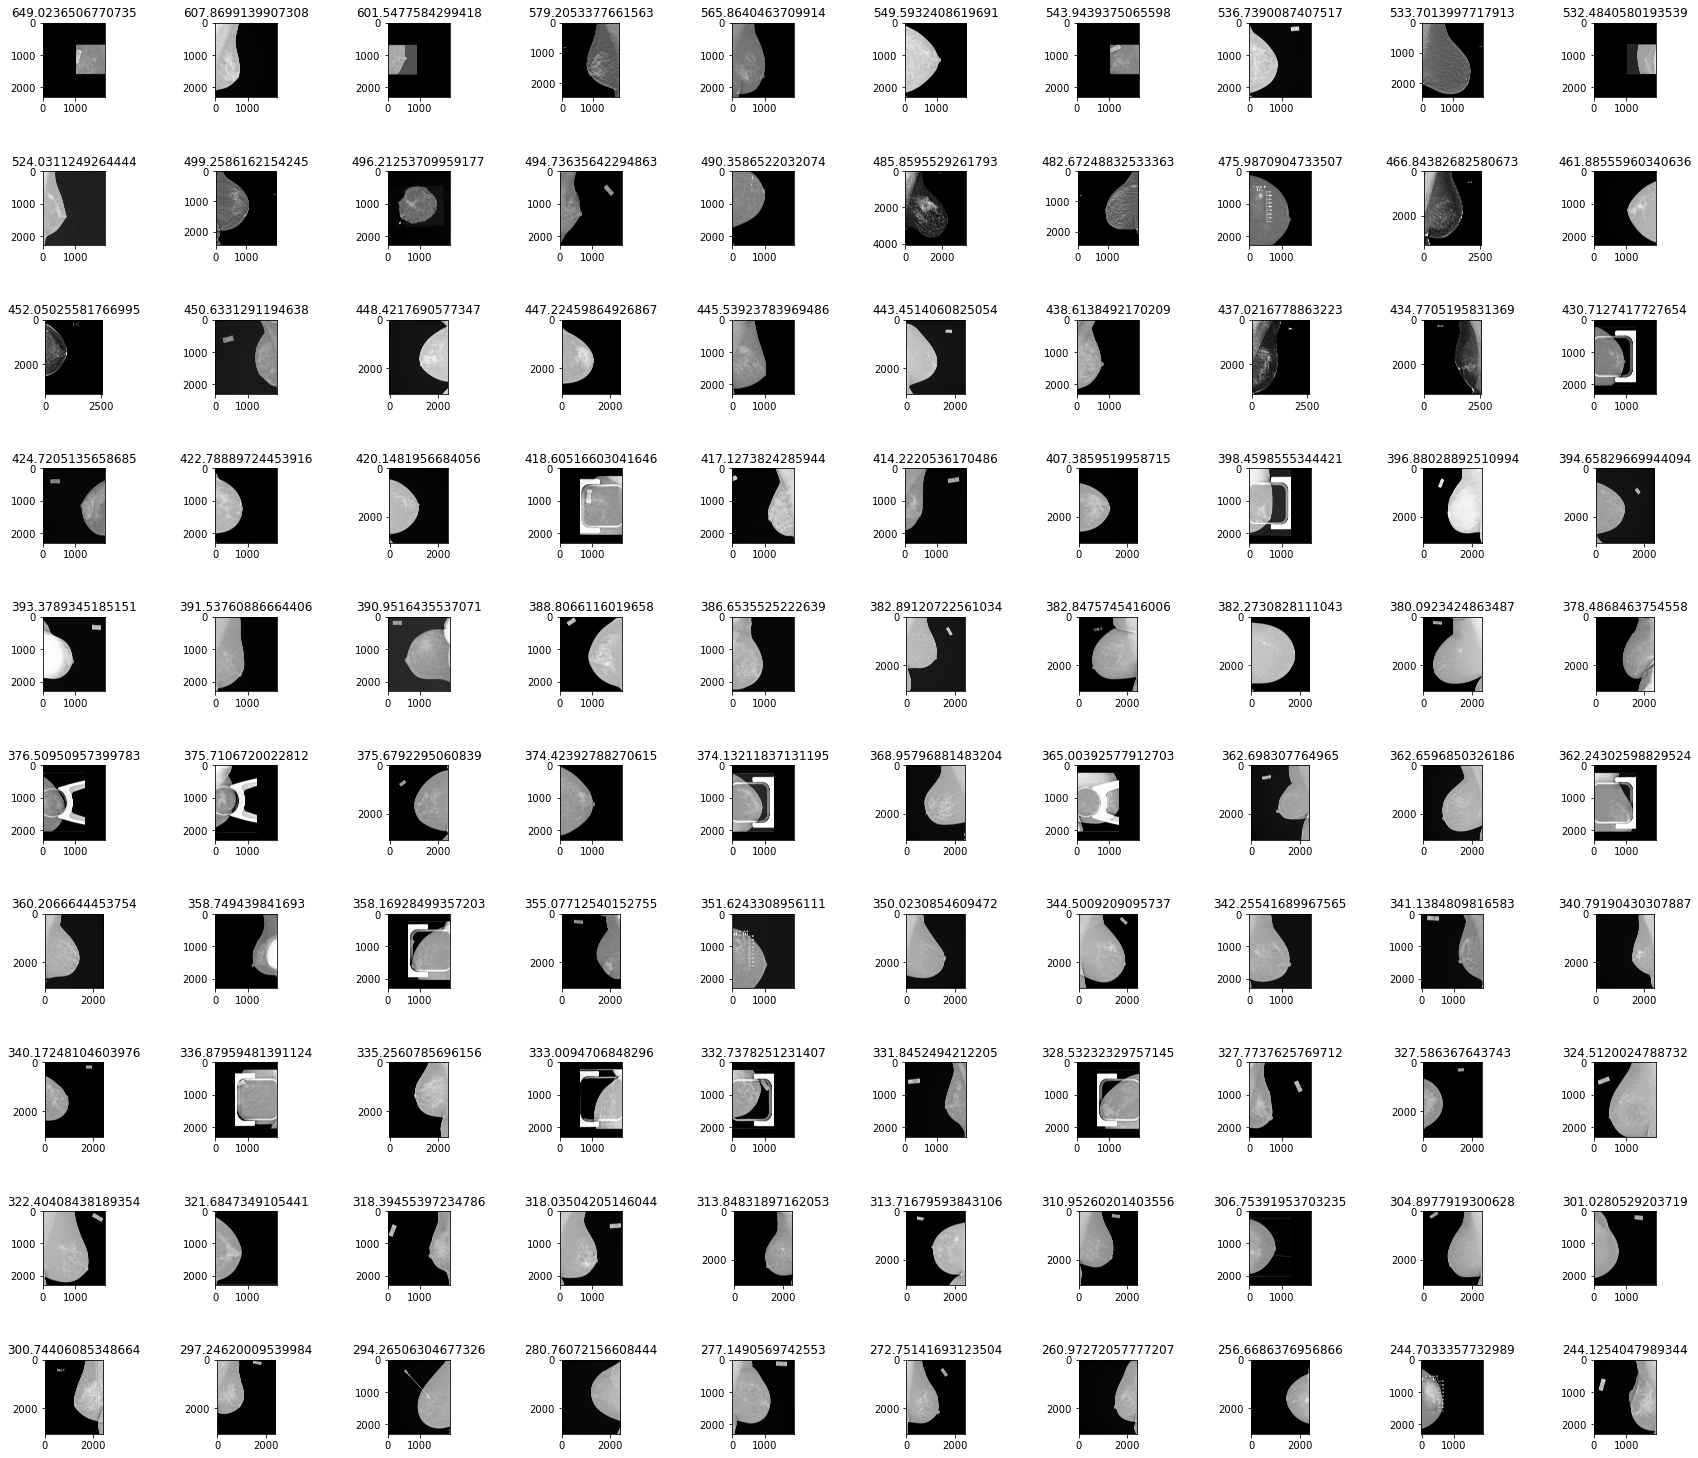

In [15]:
O.OutlierDetector.view(x, train_scores=tsXmax, hists=False)

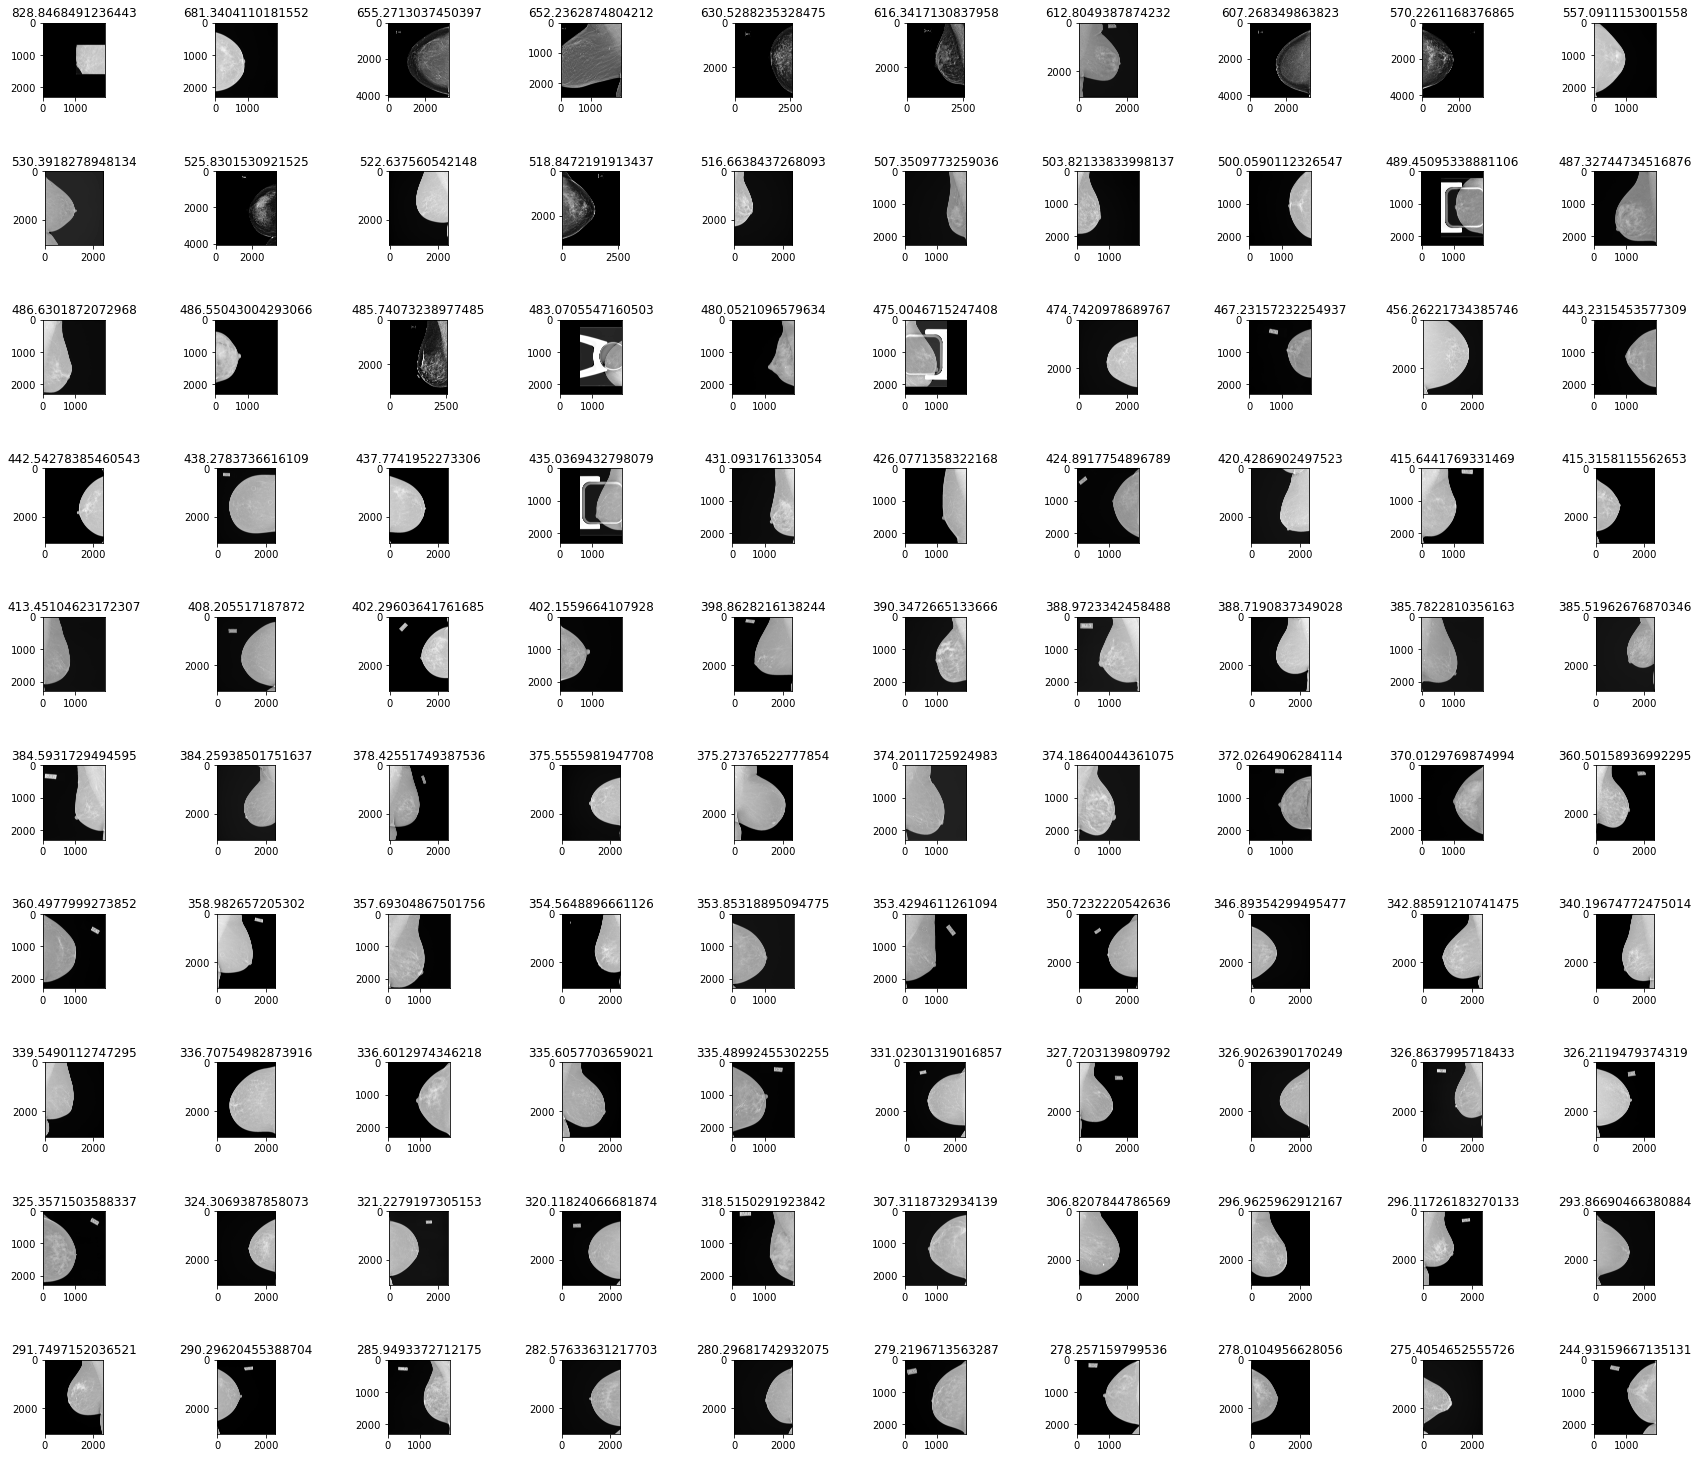

In [16]:
O.OutlierDetector.view(y, train_scores=tsYmax, hists=False)